### Bayesian Data Analysis, 3rd ed
## Chapter 2, demo 3

Authors:
- Aki Vehtari <aki.vehtari@aalto.fi>
- Tuomas Sivula <tuomas.sivula@aalto.fi>

Probability of a girl birth given placenta previa (BDA3 p. 37).
Simulate samples from Beta(438,544), draw a histogram with quantiles, and do the same for a transformed variable.

In [2]:
# import necessary packages

import numpy as np
from scipy.stats import beta

%matplotlib inline
import matplotlib.pyplot as plt
import arviz as az
az.style.use("arviz-grayscale")

In [3]:
# add utilities directory to path
import os, sys
util_path = os.path.abspath(os.path.join(os.path.pardir, 'utilities_and_data'))
if util_path not in sys.path and os.path.exists(util_path):
    sys.path.insert(0, util_path)

# import from utilities
import plot_tools

In [4]:
# edit default plot settings
plt.rc('font', size=12)

In [5]:
# plotting grid
x = np.linspace(0.36, 0.54, 150)

# draw n random samples from Beta(438,544)
n = 10000
th = beta.rvs(438, 544, size=n)  # rvs comes from `random variates`

# get samples for the transformed variable
phi = (1-th)/th

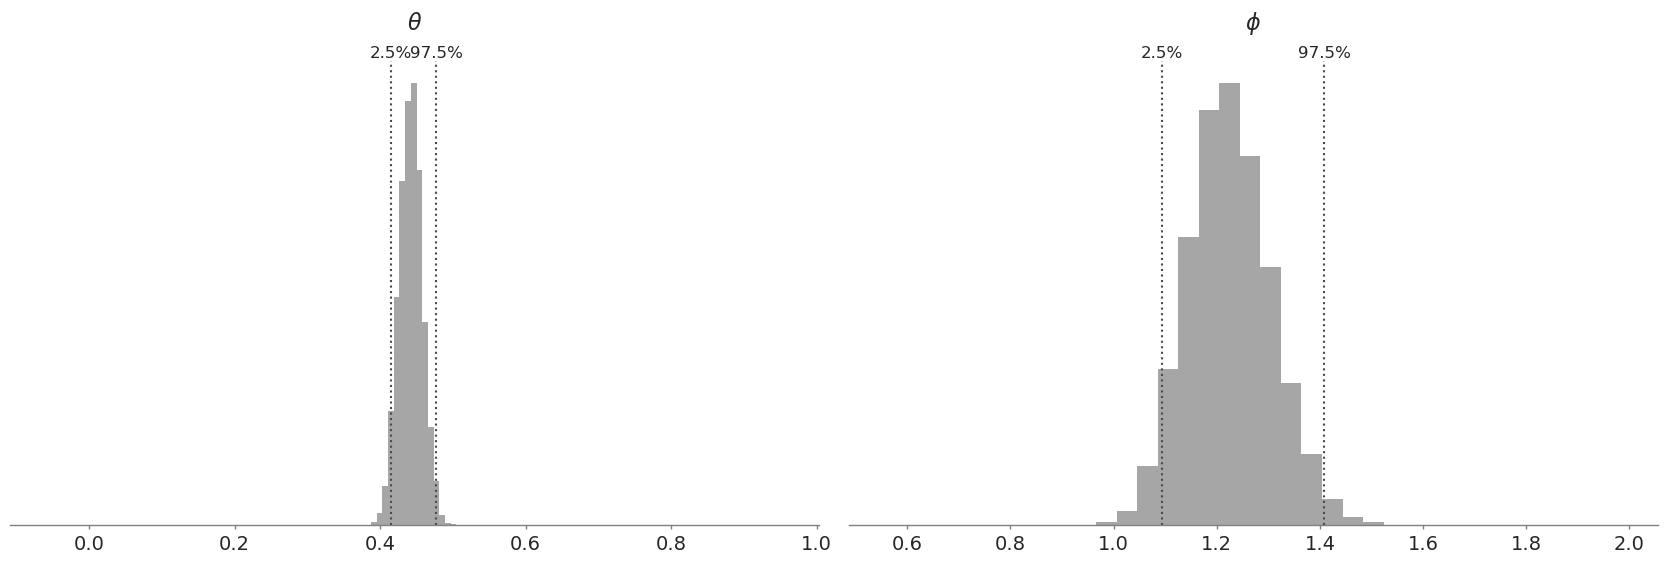

In [6]:
idata = az.from_dict({r'$\theta$': th, r'$\phi$': phi})
quantiles = idata.posterior.quantile([0.025, 0.975])
axes = az.plot_posterior(idata, kind='hist', point_estimate=None, hdi_prob="hide")

# draw quantile lines
for idx, var in enumerate(quantiles):
    ymin, ymax = axes[idx].get_ylim()
    axes[idx].vlines(quantiles[var], ymin, ymax, color='C1', ls=":")
    axes[idx].text(
        quantiles[var].sel(quantile=0.025),
        ymax+15,
        '2.5%',
         horizontalalignment='center'
    )
    axes[idx].text(
        quantiles[var].sel(quantile=0.975),
        ymax+15,
        '97.5%',
        horizontalalignment='center'
    )